In [135]:
import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# loading data

In [136]:
df= pd.read_csv('D:\OneDrive - Al Azhar University\Desktop\listings.csv')

In [137]:
df.shape

(7608, 18)

In [138]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,336,2023-05-31,1.95,1,7,40,NaN
1,20168,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.10,2,0,0,NaN
2,213371,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,NaN,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,23,2023-01-08,0.16,1,2,1,0363 F88F 4B47 6E9B 225B


# Displaying columns data types

In [139]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [140]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

# checking data for missing and null values

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7608 non-null   int64  
 1   name                            7608 non-null   object 
 2   host_id                         7608 non-null   int64  
 3   host_name                       7608 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7608 non-null   object 
 6   latitude                        7608 non-null   float64
 7   longitude                       7608 non-null   float64
 8   room_type                       7608 non-null   object 
 9   price                           7608 non-null   int64  
 10  minimum_nights                  7608 non-null   int64  
 11  number_of_reviews               7608 non-null   int64  
 12  last_review                     68

In [142]:
df.duplicated().sum()

0

 ##### we notice that there isn't dublicated values.

In [143]:
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               7608
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        710
reviews_per_month                  710
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1134
dtype: int64

<Axes: >

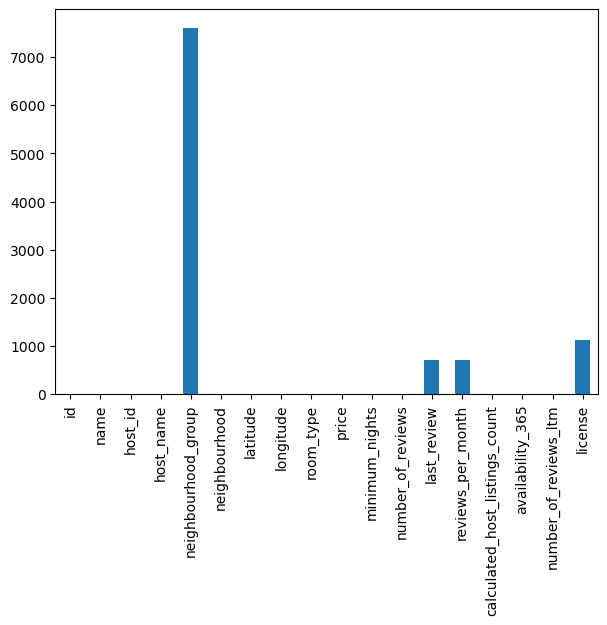

In [144]:
df.isnull().sum().plot.bar(figsize=(7,5))

#### Issues:
* Delete 'neighbourhood_group column', it is an empty column.
* Delete irrelevant columns,such as 'id', 'name', 'host_id', 'host_name', 'license','last_review'.

In [145]:
#delete neighbourhood_group an empty column
df.drop(columns='neighbourhood_group', inplace=True)

In [146]:
#Remove irrelevant columns
df.drop(['id','name','host_id','host_name','license','last_review'], axis=1, inplace=True)

In [147]:
# Fill missing values with 0
df=df.fillna(0)  

In [148]:
df.isna().sum()

neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

# EDA

In [149]:
df.describe().round(3)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,7608.000,7608.000,7608.000,7608.000,7608.000,7608.000,7608.000,7608.000,7608.000
mean,52.367,4.890,251.066,4.915,47.499,1.061,1.799,79.587,11.799
std,0.017,0.035,263.170,33.264,106.403,2.267,2.591,106.483,33.470
min,52.290,4.756,0.000,1.000,0.000,0.000,1.000,0.000,0.000
25%,52.356,4.866,148.000,2.000,3.000,0.200,1.000,0.000,0.000
50%,52.366,4.888,202.000,3.000,11.000,0.480,1.000,21.000,3.000
75%,52.376,4.908,300.000,4.000,40.000,1.110,1.000,145.000,9.000
max,52.425,5.026,12000.000,1001.000,2720.000,114.930,22.000,365.000,1626.000


### conclusion for numerical Data:
* we note that all homes are in the same area, as their latitude and longitude range between(52.36 latitude and 4.88 longitude).
* we also note that the average of prices is 251 dolars for 4 nights, and this type of rooms was available year around at rate      79 days.
* On the other hand, we notice that 25% of those rooms are priced at about 148 dolars for 2 nights,but their availability throughout the year is 0, and 75% of them reaches to 300 dolars and about 145 rooms are available throughout the year.
* As well as, there are some rooms, whose rent reaches 12000 dolars.

In [150]:
df.describe(include=['object'])

,neighbourhood,room_type
count,7608,7608
unique,22,4
top,De Baarsjes - Oud-West,Entire home/apt
freq,1260,5783


### conclusion for categorical Data:
* we note that most inhabited neighbourhood is De Baarsjes - Oud-West at the rate of 1260.
* we also note that  the most popular rooms were Entire home/apt at the rate of 5783. 

### Frequency distribution of the data for each feature

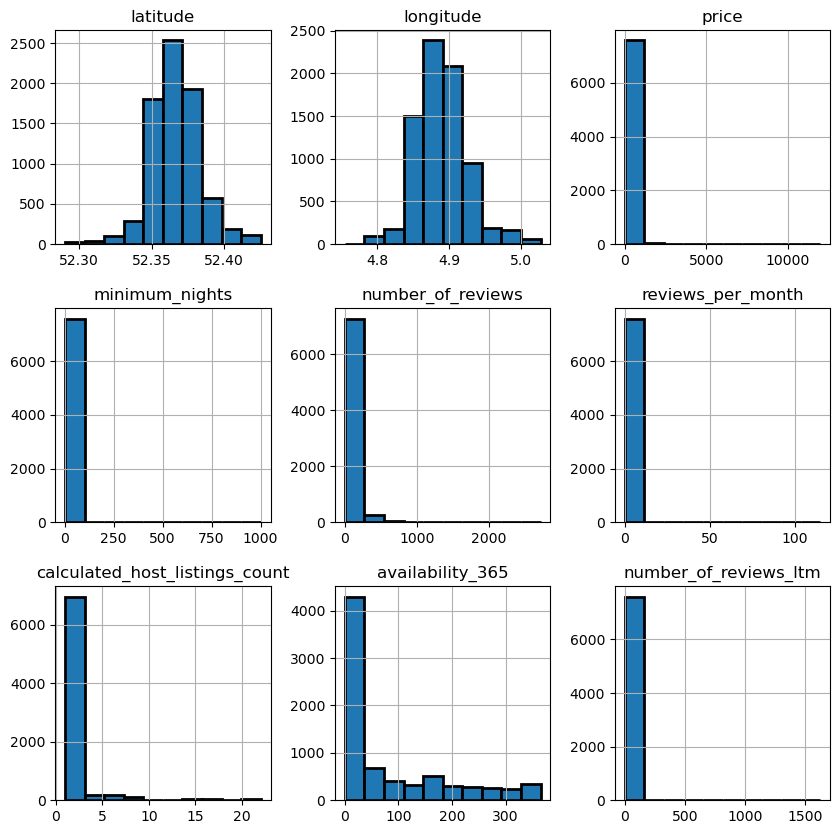

In [151]:
df[df.columns].hist(figsize=(10,10),edgecolor='black',linewidth=2)
plt.show()

* As we see most features have a right skew, except latitude and longitude both of them have normal distribution.
* This means that there are outliers affecting the data for each feature.

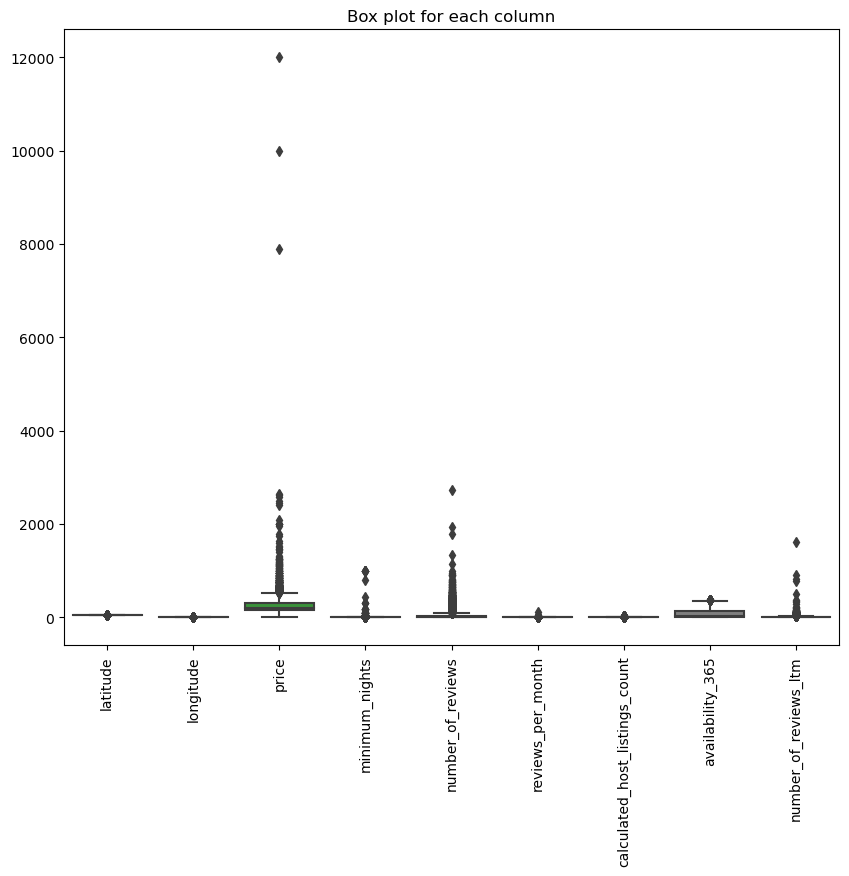

In [152]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.title('Box plot for each column')
plt.xticks(rotation=90)
plt.show()

#### handling  outliers in column price:
+ if outliers are high we will make them equal to (max or min).
+ if outliers are small we will remove them.

In [153]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_num = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
len(outliers_num)

353

In [154]:
df['price'].count()

7608

 #### As we see outliers are very small so we will remove them.

In [155]:
df = df[~df.index.isin(outliers_num.index)]
df['price'].count()

7255

#### Linear correlation between the columns with each other:

C:\Users\rmdan\AppData\Local\Temp\ipykernel_8364\3867150519.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



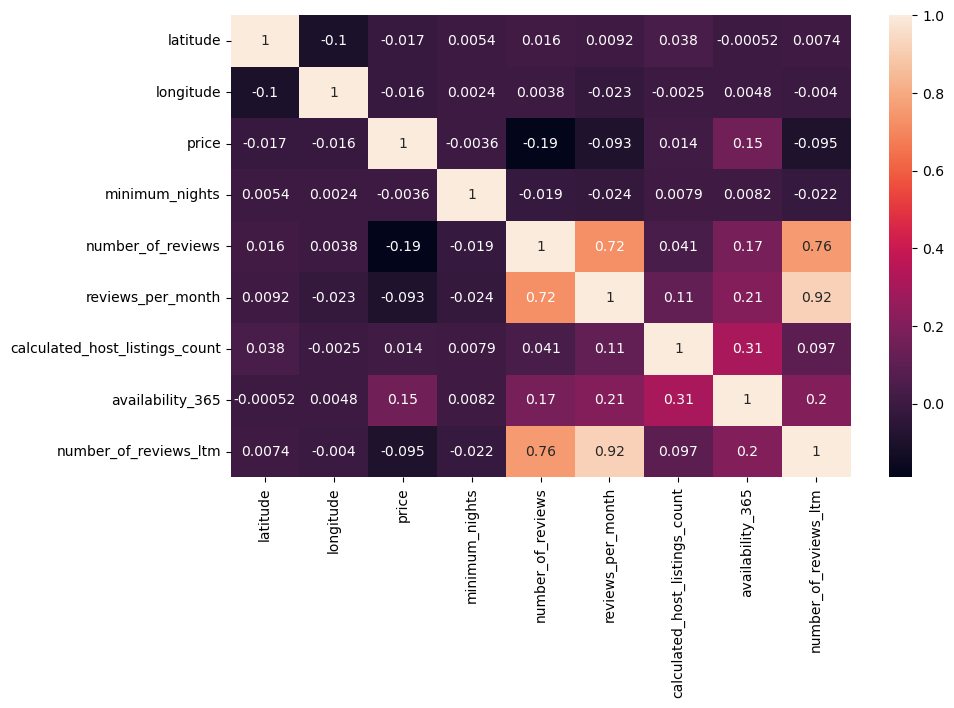

In [173]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Univariate Analysis

  ### - Quantitive Data:

In [156]:
#Describe price column
df.price.describe()

count    7255.000000
mean      220.660924
std       103.574520
min         0.000000
25%       144.000000
50%       200.000000
75%       284.500000
max       525.000000
Name: price, dtype: float64

####  visualization the prices distribution using histogram:

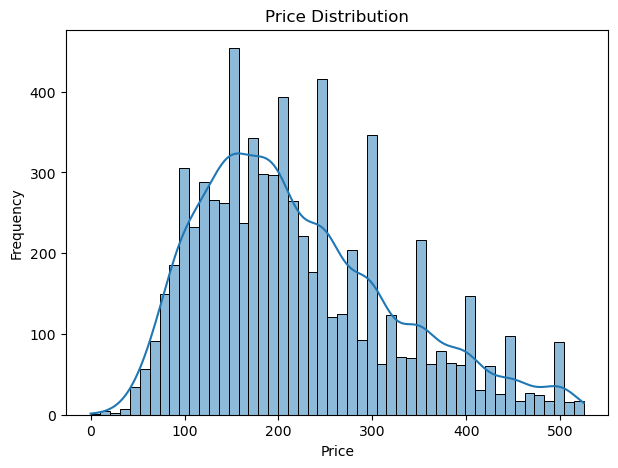

In [157]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='price',bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### - categorical Data:

In [158]:
#Describe room_type column
counts=df.room_type.value_counts()
counts

Entire home/apt    5459
Private room       1700
Hotel room           54
Shared room          42
Name: room_type, dtype: int64

In [159]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [160]:
fig=px.bar(x=counts.index,y=counts.values, color=counts.index,title='Bar Chart for Room Types',
           labels={'x':'Room Type','y':'count'})
fig.update_layout(
    width=700,
    height=500
)
fig.show()

#### conclousion:
* we see that 'Entire home/apt' listings are the most common with count 5459, then Private room with count 1700.
* the third place Shared room with count 54.
* But,'Shared room ' listings are the least common with count 42.

In [161]:
df['neighbourhood'].nunique()

22

In [187]:
df['neighbourhood'].value_counts()

De Baarsjes - Oud-West                    1208
Centrum-West                               893
De Pijp - Rivierenbuurt                    832
Centrum-Oost                               671
Westerpark                                 516
Zuid                                       471
Oud-Oost                                   439
Bos en Lommer                              376
Oud-Noord                                  329
Oostelijk Havengebied - Indische Buurt     280
Watergraafsmeer                            220
Noord-West                                 196
IJburg - Zeeburgereiland                   160
Slotervaart                                147
Noord-Oost                                 119
Geuzenveld - Slotermeer                     92
Buitenveldert - Zuidas                      81
De Aker - Nieuw Sloten                      57
Gaasperdam - Driemond                       49
Bijlmer-Centrum                             46
Osdorp                                      43
Bijlmer-Oost 

#### The distribution of neighborhoods according to the presence of Rooms in them:

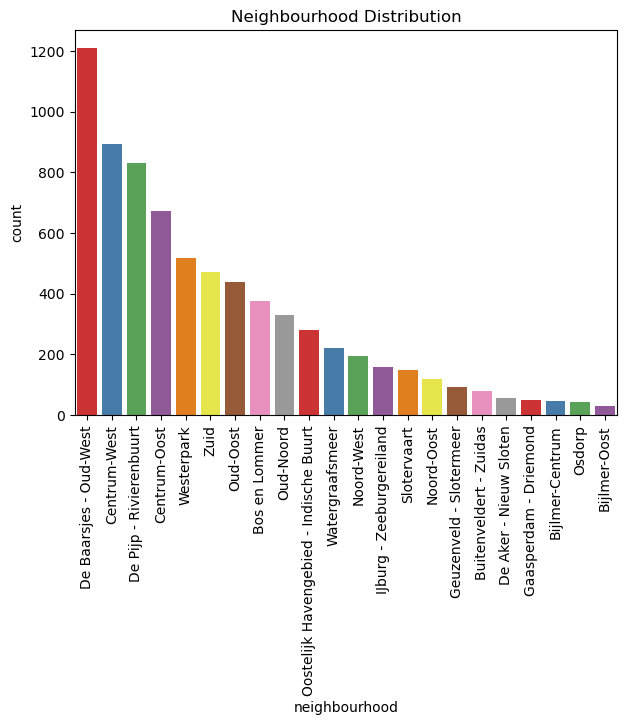

In [163]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='neighbourhood',order=df['neighbourhood'].value_counts().index,palette='Set1')
plt.title("Neighbourhood Distribution")
plt.xticks(rotation=90)
plt.show()

#### conclousion:
* the first place in demand was for De Baarsjes - Oud-West neighbourhood with 1260 rooms
* Bijlmer-Oost was the least neighborhood in demand with 30 rooms

###   Bivariate Analysis

#### the price average of each room_type:

In [164]:
avg_room_price = df.groupby(['room_type'])['price'].mean()
avg_room_price

room_type
Entire home/apt    238.319106
Hotel room         212.203704
Private room       166.264706
Shared room        138.142857
Name: price, dtype: float64

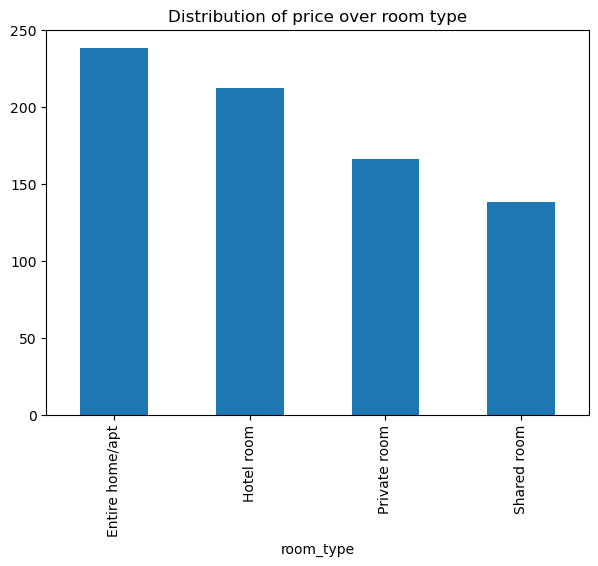

In [165]:
avg_room_price.plot.bar(figsize=(7,5))
plt.title('Distribution of price over room type')
plt.show()

##### We can see that the entire apartment/home are the most expensive of room types, while Shared room renting is the cheapest  .

In [197]:
df['minimum_nights'].nunique()

48

In [205]:
features=['minimum_nights','price']

In [207]:
df.groupby('minimum_nights')['price'].mean().reset_index().round(2).T

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
minimum_nights,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,...,120.0,150.0,180.0,183.0,300.0,444.0,800.0,999.0,1000.0,1001.0
price,222.59,213.07,223.75,235.83,228.62,214.98,239.67,202.67,165.89,194.57,...,195.0,160.0,82.5,120.0,179.0,200.0,131.0,280.0,290.2,121.0


####  describe prices variation across different neighbourhoods :

In [167]:
df.groupby('neighbourhood')['price'].describe().round(2).T

neighbourhood,Bijlmer-Centrum,Bijlmer-Oost,Bos en Lommer,Buitenveldert - Zuidas,Centrum-Oost,Centrum-West,De Aker - Nieuw Sloten,De Baarsjes - Oud-West,De Pijp - Rivierenbuurt,Gaasperdam - Driemond,...,Noord-Oost,Noord-West,Oostelijk Havengebied - Indische Buurt,Osdorp,Oud-Noord,Oud-Oost,Slotervaart,Watergraafsmeer,Westerpark,Zuid
count,46.00,30.00,376.00,81.00,671.00,893.00,57.00,1208.00,832.00,49.00,...,119.00,196.00,280.00,43.00,329.00,439.00,147.00,220.00,516.00,471.00
mean,143.04,154.50,190.97,188.43,245.13,242.53,161.07,225.68,244.86,128.37,...,178.83,188.29,188.54,177.60,206.13,215.86,181.35,213.14,216.38,237.29
std,79.74,64.91,92.56,88.90,111.80,105.67,108.01,99.17,101.50,69.32,...,97.33,90.22,89.39,109.45,99.05,96.52,99.51,102.19,96.16,108.58
min,36.00,42.00,39.00,50.00,40.00,18.00,49.00,0.00,50.00,45.00,...,40.00,30.00,43.00,35.00,42.00,51.00,42.00,39.00,45.00,63.00
25%,82.75,116.25,122.75,130.00,157.00,159.00,90.00,150.00,167.75,79.00,...,110.00,123.50,121.50,86.00,135.00,149.00,100.00,133.75,145.00,150.00
50%,140.00,150.00,179.00,178.00,221.00,225.00,125.00,207.00,230.00,110.00,...,153.00,172.00,170.00,142.00,183.00,199.00,166.00,195.00,200.00,220.00
75%,185.00,198.75,240.00,220.00,317.50,313.00,175.00,282.00,300.00,163.00,...,220.00,241.00,250.00,247.50,263.00,267.00,247.00,272.75,279.00,300.00
max,425.00,325.00,516.00,500.00,525.00,525.00,450.00,525.00,525.00,350.00,...,470.00,500.00,500.00,450.00,514.00,520.00,500.00,499.00,525.00,522.00


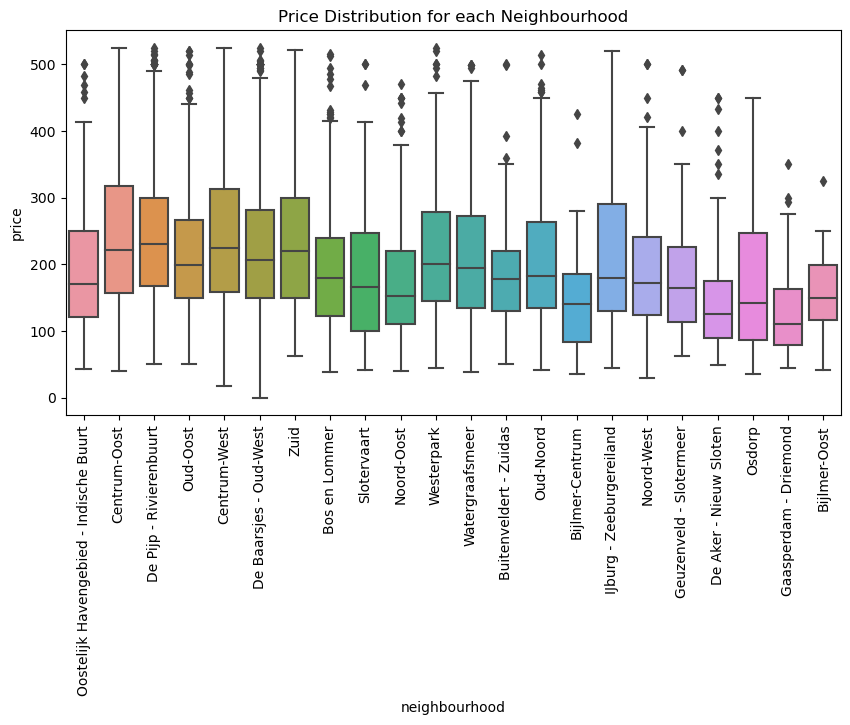

In [168]:
plt.figure(figsize=(10,5))
sns.boxplot(x='neighbourhood',y='price',data=df)
plt.title("Price Distribution for each Neighbourhood")
plt.xticks(rotation=90)
plt.show()

#### conclusion:
* As we see the  prices average are in range 150 to 250.
* We also note that most neighborhoods have rooms with prices reaching 500 dollars or more, for example Centrum-Oost, Bos en Lommer, Buitenveldert - Zuidas, And the lowest prices with an average of 150 dollars, such as	Bijlmer-Centrum, Bijlmer-Oost.

#### Room Types across Neighborhoods:

In [191]:
pd.crosstab(df['neighbourhood'],df['room_type'])

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Bijlmer-Centrum,26,0,20,0
Bijlmer-Oost,17,0,13,0
Bos en Lommer,332,0,41,3
Buitenveldert - Zuidas,59,0,22,0
Centrum-Oost,422,3,237,9
Centrum-West,495,14,375,9
De Aker - Nieuw Sloten,23,0,33,1
De Baarsjes - Oud-West,1007,9,190,2
De Pijp - Rivierenbuurt,700,2,129,1


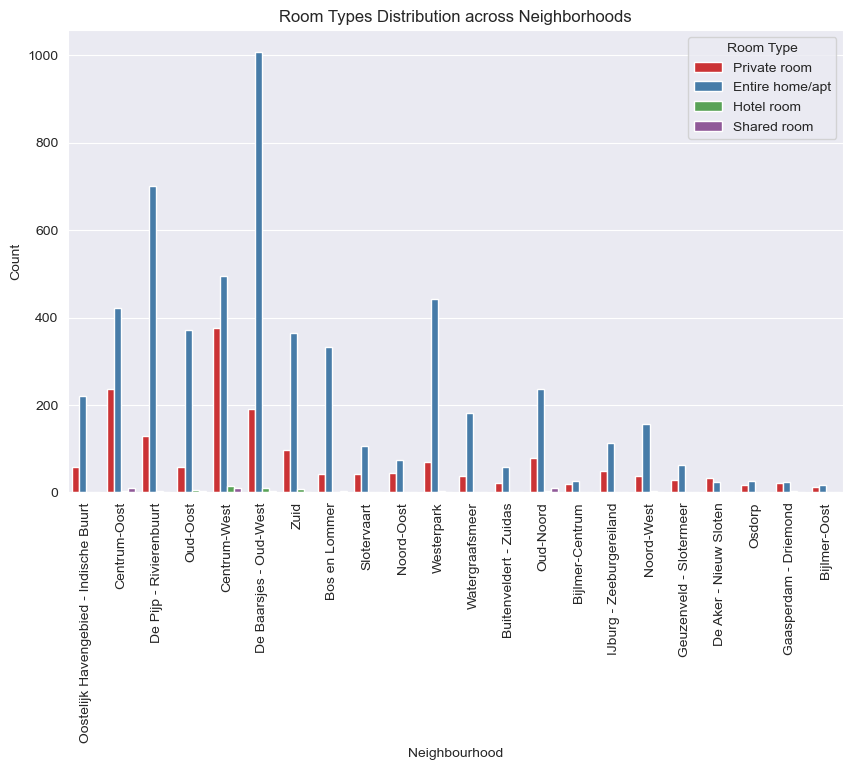

In [183]:
#the distribution of room types across different neighborhoods:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='neighbourhood',hue='room_type',palette='Set1')
plt.title("Room Types Distribution across Neighborhoods")
plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Room Type")
sns.set_style("darkgrid")
plt.show()

#### As we see:
* Hotel room, Shared room are so few in all neighbourhoods.
* There are some neighbourhoods which have so few renting homes, such as Bijlmer-Oost, Osdorp, Bijlmer-Centrum, Gaasperdam - Driemond.
* Entire home/apt is the most renting room type in all neighbourhoods,especially in De Baarsjes - Oud-West neighbourhood reached more than 1000, in the second place Private room, but the largest number of them existed in Centrum-West neighbourhood.

#### Neighbourhood and Number of Reviews:

In [193]:
# Create a pivot table to illustrate the relationship between the neighborhood and the number of reviews average
table_neighbourhood_reviews = df.pivot_table(index='neighbourhood', values='number_of_reviews', aggfunc='mean').round(2)
table_neighbourhood_reviews

,number_of_reviews
neighbourhood,
Bijlmer-Centrum,72.13
Bijlmer-Oost,27.13
Bos en Lommer,28.98
Buitenveldert - Zuidas,35.16
Centrum-Oost,76.08
Centrum-West,84.22
De Aker - Nieuw Sloten,50.70
De Baarsjes - Oud-West,37.93
De Pijp - Rivierenbuurt,42.82


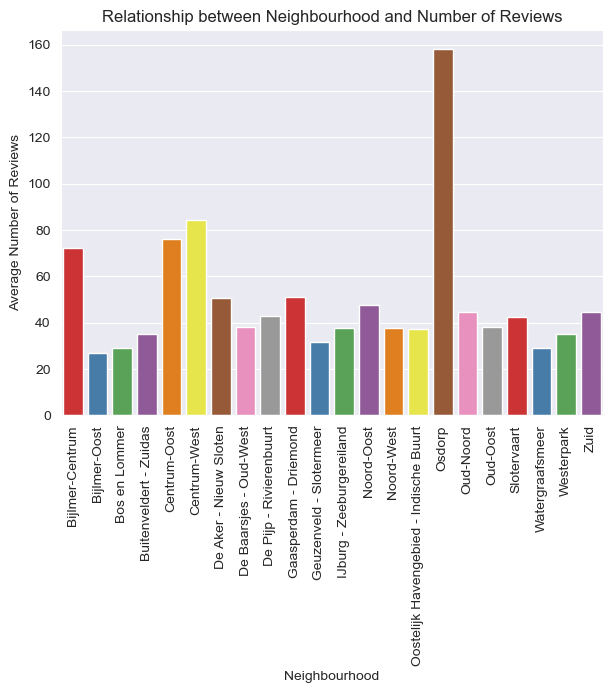

In [194]:
plt.figure(figsize=(7,5))
sns.barplot(x=table_neighbourhood_reviews.index, y=table_neighbourhood_reviews['number_of_reviews'],palette='Set1')
plt.title("Relationship between Neighbourhood and Number of Reviews")
plt.xlabel("Neighbourhood")
plt.ylabel("Average Number of Reviews")
plt.xticks(rotation=90)
plt.show()

#### As we see:
* `Osdorp` is the highest neighbourhood in the average number of reviews with about 160 reviews, that explains the low prices range(80-450) dollars, in addition to the low number of rooms being rented in this neighbourhood.